<a href="https://colab.research.google.com/github/AsyrofiAnam/Luminique-/blob/main/Prediksi_hasil_permainan_catur_menggunakan_Rating_dan_Jumlah_Gerakan_Pemain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi hasil permainan catur menggunakan Rating dan Jumlah Gerakan Pemain**
Nama Kelompok: Luminique🎲 \
Anggota Kelompok : \
    1. Asyrofi Anam \
		2. Devid Pratama Sahar \
		3. Muhammad Aziz \
		4. Muhammad Zhaky Arkan \
Link dataset 	: https://www.kaggle.com/datasets/datasnaek/chess \
Algoritma yang digunakan : K-Nearest Neighbors (KNN)

# **Import Library**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Eksplorasi Data**

### **Membaca data dari file CSV**

In [58]:
chess = pd.read_csv("/content/drive/MyDrive/UAS KECERDASAN BUATAN/games.csv")
chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


### **Menampilkan informasi dan deskripsi**

In [59]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [60]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


### **Menampilkan jumlah baris, kolom, missing values, dan data duplikat**

In [61]:
print("jumlah baris pada dataset : ", chess.shape[0])
print("jumlah kolom pada dataset : ", chess.shape[1])

jumlah baris pada dataset :  20058
jumlah kolom pada dataset :  16


In [62]:
print("Jumlah data yang memiliki missing value: ", chess.isnull().sum().sum())

Jumlah data yang memiliki missing value:  0


In [63]:
jumlah_duplikat = chess[chess.duplicated()]
print("Jumlah data yang terduplikasi: ", jumlah_duplikat.shape)

Jumlah data yang terduplikasi:  (429, 16)


### **Menghapus data duplikat**

In [64]:
chess = chess.drop_duplicates()
chess.count()

id                19629
rated             19629
created_at        19629
last_move_at      19629
turns             19629
victory_status    19629
winner            19629
increment_code    19629
white_id          19629
white_rating      19629
black_id          19629
black_rating      19629
moves             19629
opening_eco       19629
opening_name      19629
opening_ply       19629
dtype: int64

### **Visualisasi distribusi pemenang**

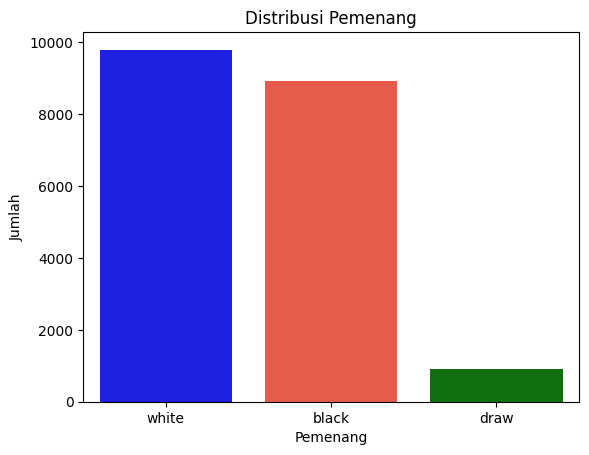

In [65]:
sns.countplot(x='winner', hue='winner', data=chess, palette={'white': 'blue', 'black': '#FF4733', 'draw': 'green'}, legend=False)
plt.title('Distribusi Pemenang')
plt.xlabel('Pemenang')
plt.ylabel('Jumlah')
plt.show()

# **Preprocessing Data**

### **Memilih fitur dan target**

In [66]:
fitur = chess[['white_rating', 'black_rating', 'turns']]
target = chess['winner']

### **Mengubah label target menjadi nilai numerik**

In [67]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

### **Menampilkan korelasi fitur**

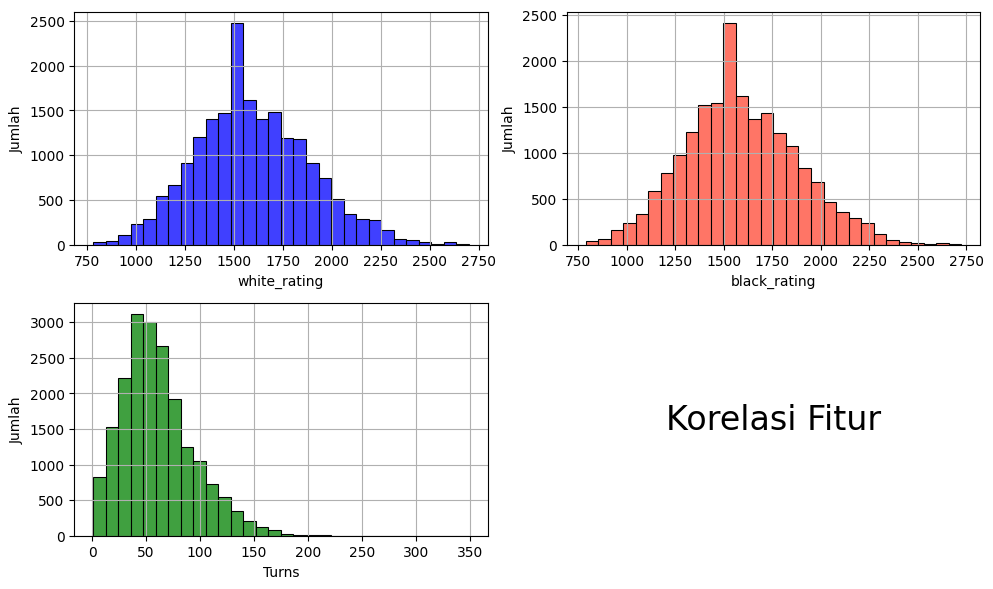

In [68]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(chess['white_rating'], color='blue', bins=30)
plt.xlabel('white_rating')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(chess['black_rating'], color='#FF4733', bins=30)
plt.xlabel('black_rating')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(chess['turns'], color='green', bins=30)
plt.xlabel('Turns')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.axis('off')
plt.annotate('Korelasi Fitur', xy=(0.5, 0.5),
             fontsize=24, ha='center', va='center')

plt.tight_layout()
plt.show()

### **Normalisasi fitur**

In [69]:
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

### **Visualisasi fitur yang sudah dinormalisasi**

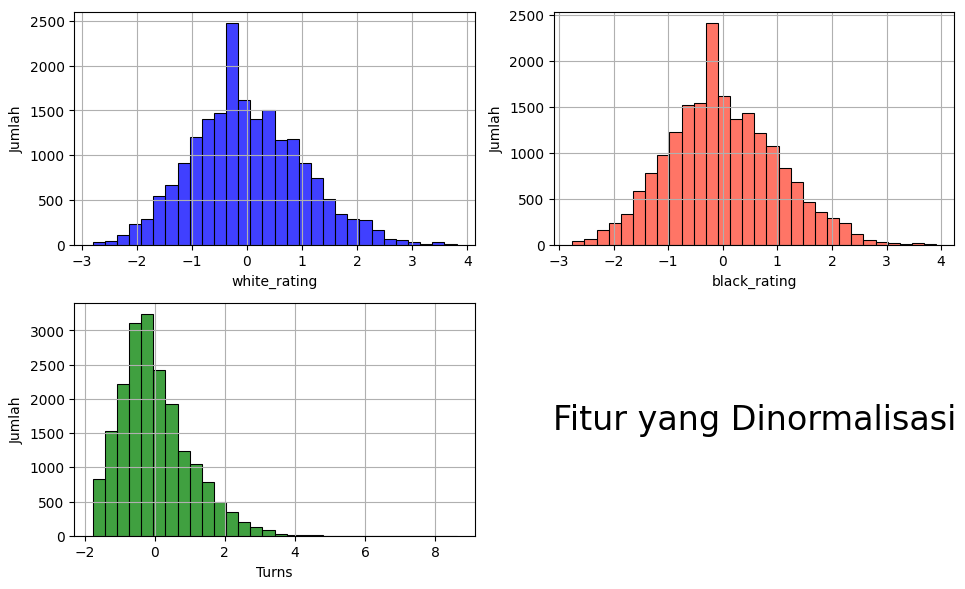

In [70]:
fitur_scaled_df = pd.DataFrame(fitur_scaled, columns=fitur.columns)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(fitur_scaled_df['white_rating'], color='blue', bins=30)
plt.xlabel('white_rating')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(fitur_scaled_df['black_rating'], color='#FF4733', bins=30)
plt.xlabel('black_rating')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(fitur_scaled_df['turns'], color='green', bins=30)
plt.xlabel('Turns')
plt.ylabel('Jumlah')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.axis('off')
plt.annotate('Fitur yang Dinormalisasi', xy=(0.5, 0.5),
             fontsize=24, ha='center', va='center')

plt.tight_layout()
plt.show()

### **Membagi data menjadi set pelatihan dan pengujian**


In [71]:
X_train, X_test, y_train, y_test = train_test_split(fitur_scaled, target_encoded, test_size=0.2, random_state=42)

# **Training dan Pengujian Data**

### **Menentukan nilai K terbaik menggunakan cross-validation**

In [72]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

### **Visualisasi nilai K terbaik berdasarkan hasil cross-validation**

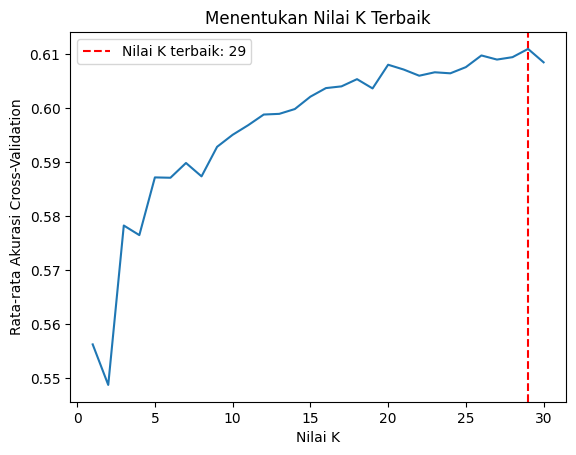

In [73]:
best_k = k_range[np.argmax(k_scores)]
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Nilai K terbaik: {best_k}')

plt.plot(k_range, k_scores)
plt.xlabel('Nilai K')
plt.ylabel('Rata-rata Akurasi Cross-Validation')
plt.title('Menentukan Nilai K Terbaik')
plt.legend()
plt.show()

### **Melatih model KNN dengan nilai K terbaik**

In [74]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

### **Melakukan prediksi**

In [75]:
y_pred = knn.predict(X_test)

# **Evaluasi Model**

### **Mengevaluasi model**

In [76]:
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {akurasi * 100:.2f}%')

Akurasi Model: 60.04%


### **Laporan klasifikasi**

In [77]:
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Laporan Klasifikasi:
              precision    recall  f1-score   support

       black       0.57      0.61      0.59      1763
        draw       0.00      0.00      0.00       179
       white       0.62      0.65      0.64      1984

    accuracy                           0.60      3926
   macro avg       0.40      0.42      0.41      3926
weighted avg       0.57      0.60      0.59      3926



# **Contoh Hasil Prediksi**

### **Menampilkan contoh hasil prediksi**

In [78]:
data_test = 9

data_contoh = X_test[data_test].reshape(1, -1)
prediksi_contoh = knn.predict(data_contoh)
hasil_prediksi = label_encoder.inverse_transform(prediksi_contoh)[0]
data_asli = label_encoder.inverse_transform([y_test[data_test]])[0]

In [79]:
print(f'Data Contoh ke {data_test}:', scaler.inverse_transform(data_contoh))
print(f'Prediksi Hasil Permainan ke {data_test}:', hasil_prediksi)
print(f'Data Asli Hasil Permainan ke {data_test}:', data_asli)

Data Contoh ke 9: [[2105. 1738.   40.]]
Prediksi Hasil Permainan ke 9: white
Data Asli Hasil Permainan ke 9: white


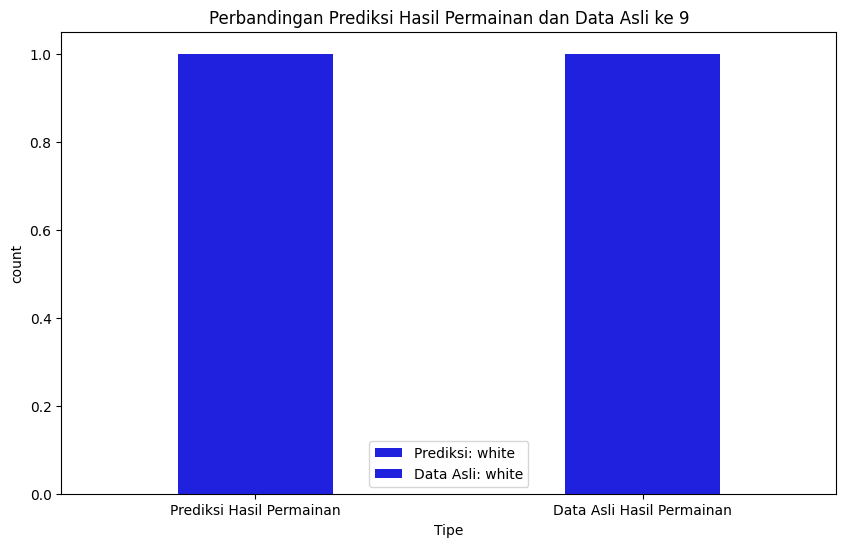

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x=['Prediksi Hasil Permainan', 'Data Asli Hasil Permainan'], hue=[hasil_prediksi, data_asli],
              palette={'white': 'blue', 'black': '#FF4733', 'draw': 'green'}, width=0.4)

plt.title(f'Perbandingan Prediksi Hasil Permainan dan Data Asli ke {data_test}')
plt.xlabel('Tipe')

plt.legend(['Prediksi: ' + hasil_prediksi, 'Data Asli: ' + data_asli])

plt.show()